<a href="https://colab.research.google.com/github/apathyhill/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [2]:
import pandas as pd

income = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
lifespan = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
population = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv")
entities = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv")
concepts = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv")
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [3]:
df = pd.merge(income, lifespan)
df = pd.merge(df, population)
df = pd.merge(df, entities[["country", "name", "world_4region", "world_6region"]], left_on="geo", right_on="country")

df = df.rename(columns={
    "country": "country_code",
    "time": "Year", 
    "income_per_person_gdppercapita_ppp_inflation_adjusted": "Income", 
    "life_expectancy_years": "Lifespan",
    "population_total": "Population",
    "name": "country",
    "world_6region": "World Region",
    "world_4region": "4region"
})

print(df.shape)
df.head()

(40437, 9)


,geo,Year,Income,Lifespan,Population,country_code,country,4region,World Region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(483.5451459087208, 100000)

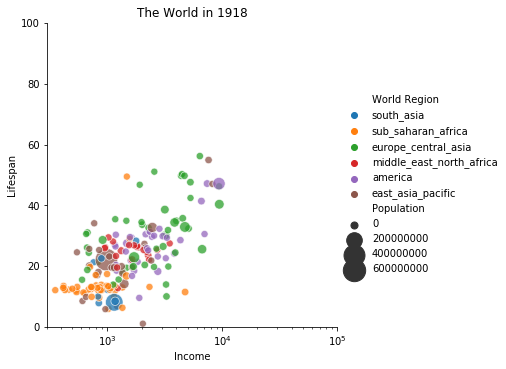

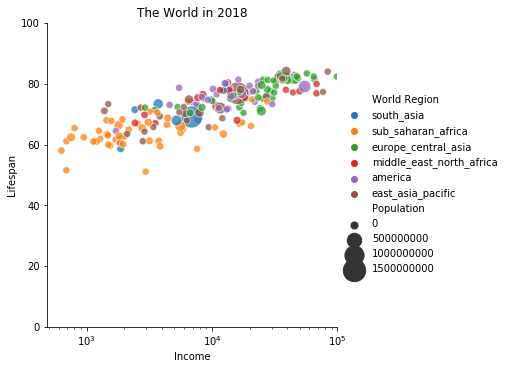

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_2018 = df[df["Year"] == 2018]
df_1918 = df[df["Year"] == 1918]
df_2018.head()

sns.relplot(x="Income", y="Lifespan", size="Population", hue="World Region", sizes=(50, 500), alpha=0.75, data=df_1918)
plt.xscale("log")
plt.title("The World in 1918")
plt.ylim(0, 100)
plt.xlim(0, 100000)

sns.relplot(x="Income", y="Lifespan", size="Population", hue="World Region", sizes=(50, 500), alpha=0.75, data=df_2018)
plt.xscale("log")
plt.title("The World in 2018")
plt.ylim(0, 100)
plt.xlim(0, 100000)

   Population  Income              World Region  Year
0   209432253    6575                south_asia  1800
1    62611128   29108        sub_saharan_africa  1800
2   218670358   63976       europe_central_asia  1800
3    25476838   18982  middle_east_north_africa  1800
4    26909214   34161                   america  1800
5   403591195   21067         east_asia_pacific  1800
6   209828448    6576                south_asia  1801
7    62637051   29134        sub_saharan_africa  1801
8   219371619   63933       europe_central_asia  1801
9    25508273   19008  middle_east_north_africa  1801


(1800, 2020)

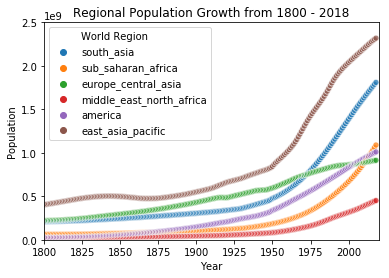

In [36]:
# My own graph

df2 = pd.DataFrame()
all_years = df["Year"].unique()

# Make lists of all variables
all_population2 = []
all_income2 = []
all_regions2 = []
all_years2 = []


# Generate lists
for year in all_years:
  df_year = df[df["Year"] == year]
  total_pop = df_year["Population"].sum() 
  
  all_population.append(total_pop)
  
  all_regions = list(df_year["World Region"].unique())
  all_regions2 += all_regions
  all_years2 += [year]*len(all_regions)
  for region in all_regions:
    df_region = df_year[df_year["World Region"] == region]
    income = df_region["Income"].sum() 
    all_income2.append(income)
    pop = df_region["Population"].sum() 
    all_population2.append(pop)
    
df2["Population"] = all_population2
df2["Income"] = all_income2
df2["World Region"] = all_regions2
df2["Year"] = all_years2

print(df2.head(10))


sns.scatterplot(x="Year", y="Population", hue="World Region", alpha=0.75, data=df2)
plt.title("Regional Population Growth from 1800 - 2018")
plt.ylim(0, 2500000000)
plt.xlim(1800, 2020)

(1800, 2020)

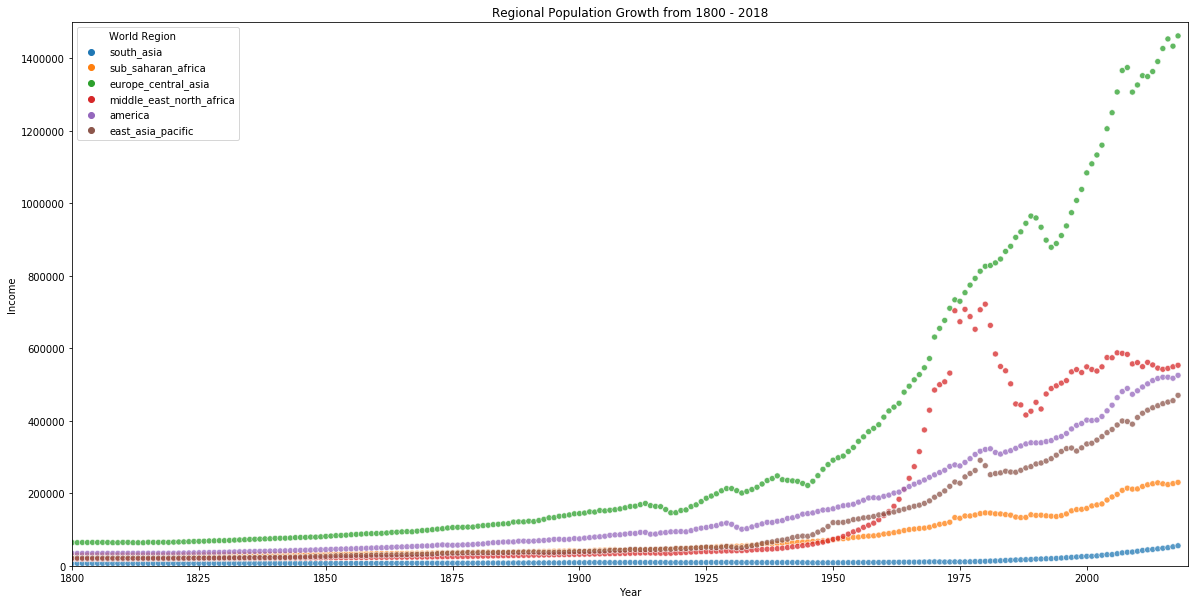

In [37]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Year", y="Income", hue="World Region", alpha=0.75, data=df2)
plt.title("Regional Population Growth from 1800 - 2018")
plt.ylim(0, 1500000)
plt.xlim(1800, 2020)

Even thought South and East Asia (India and China) are the main contributors of the global population growth, they need more money to help support its large popular. However, the graph shows that Europe shares the most wealth by far, even though its population is actually starting to stagnate.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO